In [1]:
import logging
import os
logging.basicConfig(level=logging.DEBUG)

import graphcat.notebook
import imagecat.notebook

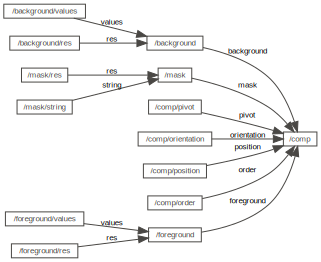

INFO:imagecat.operator.color:Task /foreground fill:
INFO:imagecat.operator.color:  layer: C
INFO:imagecat.operator.color:  res: [256 128]
INFO:imagecat.operator.color:  role: Role.RGB
INFO:imagecat.operator.color:  values: [0 0 0]
INFO:imagecat.operator.color:  output: Image(C: Layer(Role.RGB 256x128x3 float16))


Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: C'})

INFO:imagecat.operator.color:Task /background fill:
INFO:imagecat.operator.color:  layer: C
INFO:imagecat.operator.color:  res: [2560 1440]
INFO:imagecat.operator.color:  role: Role.RGB
INFO:imagecat.operator.color:  values: [1.  0.5 0. ]
INFO:imagecat.operator.color:  output: Image(C: Layer(Role.RGB 2560x1440x3 float16))


Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: C'})

INFO:imagecat.operator.render:Task /mask text:
INFO:imagecat.operator.render:  anchor: mm
INFO:imagecat.operator.render:  fontindex: 0
INFO:imagecat.operator.render:  fontname: /Users/tshead/src/imagecat/imagecat/LeagueSpartan-SemiBold.ttf
INFO:imagecat.operator.render:  fontsize: 0.33h
INFO:imagecat.operator.render:  layer: A
INFO:imagecat.operator.render:  position: ('0.5w', '0.5h')
INFO:imagecat.operator.render:  res: [256 128]
INFO:imagecat.operator.render:  string: Imagecat!
INFO:imagecat.operator.render:  output: Image(A: Layer(Role.ALPHA 256x128x1 float16))


Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: A'})

INFO:imagecat.operator.transform:Task /comp composite:
INFO:imagecat.operator.transform:  bglayer: None
INFO:imagecat.operator.transform:  fglayer: None
INFO:imagecat.operator.transform:  layer: C
INFO:imagecat.operator.transform:  masklayer: None
INFO:imagecat.operator.transform:  order: 0
INFO:imagecat.operator.transform:  orientation: 0.0
INFO:imagecat.operator.transform:  pivot: ('1w', '1h')
INFO:imagecat.operator.transform:  position: ('1w', '1h')
INFO:imagecat.operator.transform:  scale: [1, 1]
INFO:imagecat.operator.transform:  output: Image(C: Layer(Role.RGB 2560x1440x3 float16))


Accordion(children=(HTML(value=''),), _titles={'0': 'Layer: C'})

In [2]:
graph = graphcat.DynamicGraph()
monitor = graphcat.PerformanceMonitor(graph)
imagecat.add_task(graph, "/foreground", imagecat.operator.color.fill, values=[0, 0, 0], res=[256, 128])
imagecat.add_task(graph, "/background", imagecat.operator.color.fill, values=[1, 0.5, 0], res=[2560, 1440])
imagecat.add_task(graph, "/mask", imagecat.operator.render.text, res=[256, 128], string="Imagecat!")
imagecat.add_task(graph, "/comp", imagecat.operator.transform.composite, pivot=("1w", "1h"), orientation=0, position=("1w", "1h"), order=0)
imagecat.set_links(graph, "/foreground", ("/comp", "foreground"))
imagecat.set_links(graph, "/background", ("/comp", "background"))
imagecat.set_links(graph, "/mask", ("/comp", "mask"))

graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/foreground"))
imagecat.notebook.display(graph.output("/background"))
imagecat.notebook.display(graph.output("/mask"))
imagecat.notebook.display(graph.output("/comp"))

In [3]:
sorted(monitor.tasks.items(), key=lambda item: item[1], reverse=True)

[('/background', [0.0746150016784668]),
 ('/comp', [0.021509885787963867]),
 ('/mask', [0.008854866027832031]),
 ('/foreground', [0.0047800540924072266]),
 ('/mask/res', [2.288818359375e-05]),
 ('/comp/order', [1.7881393432617188e-05]),
 ('/background/res', [1.5020370483398438e-05]),
 ('/foreground/res', [1.0967254638671875e-05]),
 ('/foreground/values', [9.059906005859375e-06]),
 ('/comp/orientation', [9.059906005859375e-06]),
 ('/mask/string', [8.106231689453125e-06]),
 ('/comp/pivot', [8.106231689453125e-06]),
 ('/comp/position', [8.106231689453125e-06]),
 ('/background/values', [7.867813110351562e-06])]